In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

In [2]:
Data =  pd.read_csv("ds2_train.csv").values
X_train_initial = np.delete(Data, 2, 1)
y_train = Data[:,2]

## Normalization

In [3]:
def normalize(X_train):
    mean_values = X_train.mean(axis=0)
    min_values = X_train.min(axis=0)
    max_values = X_train.max(axis=0)
    X_train_normalized = (X_train - mean_values) / (max_values - min_values)
    return X_train_normalized
X_train = normalize(X_train_initial)
print(X_train)

[[ 0.03769575  0.4635485 ]
 [-0.01097938  0.13315536]
 [-0.10377009  0.01774436]
 ...
 [ 0.00662675 -0.17420975]
 [-0.13310541 -0.1916205 ]
 [ 0.00903721  0.00196196]]


## Visualizing data

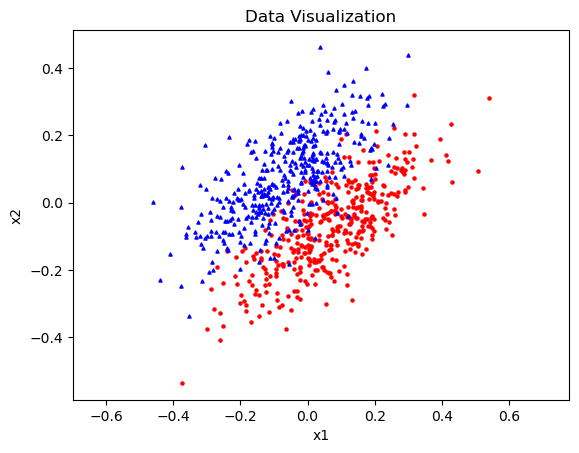

In [11]:
def plot_logistic(X_train, y_train):
    m1 = X_train[:,0]* y_train
    x1 = m1[m1 != 0]
    m2 = X_train[:,1]* y_train
    y1 = m2[m2 != 0]
    r_y_train = np.where(y_train == 0, 1, np.where(y_train == 1, 0, y_train))
    m3 = X_train[:,0]* r_y_train
    x2 = m3[m3 != 0]
    m4 = X_train[:,1]* r_y_train
    y2 = m4[m4 != 0]
    plt.scatter(x1, y1, s=5, c="red")
    plt.scatter(x2, y2, marker='^', s=5, c="blue")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title("Data Visualization")
    plt.axis('equal')
plot_logistic(X_train, y_train)

In [5]:
def sigmoid(z):  
    g = 1/(1+np.exp(-z)) 
    return g

## Cost function

In [6]:
def logistic_cost(X, y, w, b, lambda_= 1):
    m, n = X.shape
    z_wb = np.zeros(m)
    for k in range(m):
        z_wb[k] = np.dot(X[k],w) + b
    f_wb = sigmoid(z_wb)
    cost = 0
    for i in range(m):
        cost = cost + (-y[i]*math.log(f_wb[i])-(1-y[i])*math.log(1-f_wb[i]))
    total_cost = cost/m
    return total_cost

def logistic_cost_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    cost_without_reg = logistic_cost(X, y, w, b) 
    reg_cost = 0.
    for i in range(n):
        reg_cost = reg_cost + w[i]**2
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost
    return total_cost

m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = logistic_cost_reg(X_train, y_train, initial_w, initial_b)
print(cost)

0.6931471805599426


## Gradient descent

In [7]:
def logistic_gradient(X, y, w, b, lambda_=None): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)        
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_db, dj_dw
dj_db, dj_dw = logistic_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

def logistic_gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape
    dj_db, dj_dw = logistic_gradient(X, y, w, b)  
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/(m))*w[j]
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        if i<100000:   
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w_in, b_in, J_history, w_history

dj_db at initial w (zeros):0.0
dj_dw at initial w (zeros):[-0.03355425517949228, 0.036088309176776766]


In [8]:
np.random.seed(1)
initial_w = np.random.rand(X_train.shape[1])-0.5
initial_b = 1.
lambda_ = 0.01
iterations = 10000
alpha = 0.01
w,b, J_history,_ = gradient_descent(X_train, y_train, initial_w, initial_b, logistic_cost_reg, logistic_gradient_reg, alpha, iterations, lambda_)

Iteration    0: Cost     0.82   
Iteration 1000: Cost     0.68   
Iteration 2000: Cost     0.66   
Iteration 3000: Cost     0.64   
Iteration 4000: Cost     0.62   
Iteration 5000: Cost     0.60   
Iteration 6000: Cost     0.58   
Iteration 7000: Cost     0.57   
Iteration 8000: Cost     0.55   
Iteration 9000: Cost     0.54   
Iteration 9999: Cost     0.53   


## Descision boundary

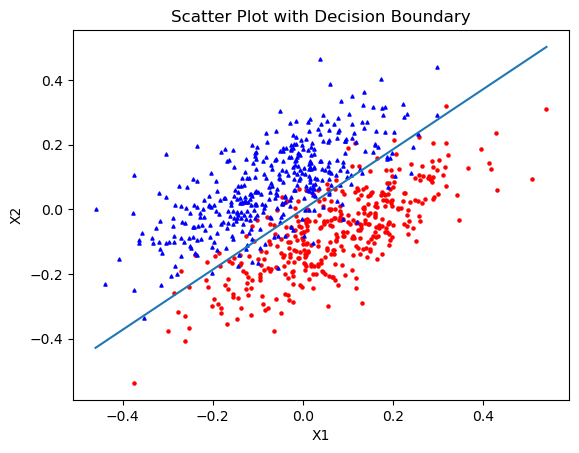

In [10]:
def plot_decision_boundary(X_train, y_train, w, b):
    m1 = X_train[:,0]* y_train
    x1 = m1[m1 != 0]
    m2 = X_train[:,1]* y_train
    y1 = m2[m2 != 0]
    r_y_train = np.where(y_train == 0, 1, np.where(y_train == 1, 0, y_train))
    m3 = X_train[:,0]* r_y_train
    x2 = m3[m3 != 0]
    m4 = X_train[:,1]* r_y_train
    y2 = m4[m4 != 0]
    x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)  # Adjust the range here
    y_values = -(w[0] / w[1]) * x_values - b / w[1]
    plt.plot(x_values, y_values)
    plt.scatter(x1, y1, s=5, c="red")
    plt.scatter(x2, y2, marker='^', s=5, c="blue")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot with Decision Boundary')
    plt.show()
plot_decision_boundary(X_train, y_train, w, b)